In [1]:
import copy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sym
from sympy.physics.quantum import TensorProduct

In [2]:
p = sym.symbols("p")
A_local = sym.Matrix([[1-p, p],[p, 1-p]])
A_local

Matrix([
[1 - p,     p],
[    p, 1 - p]])

In [3]:
def tensor_pow(A, n):
    if n < 1:
        return A
    ret = A
    for _ in range(n - 1):
        ret = TensorProduct(ret, A)
    return ret

In [4]:
A = tensor_pow(A_local, 2)
A

Matrix([
[(1 - p)**2,  p*(1 - p),  p*(1 - p),       p**2],
[ p*(1 - p), (1 - p)**2,       p**2,  p*(1 - p)],
[ p*(1 - p),       p**2, (1 - p)**2,  p*(1 - p)],
[      p**2,  p*(1 - p),  p*(1 - p), (1 - p)**2]])

In [5]:
A_inv = A.inv()
A_inv

Matrix([
[(p**2 - 2*p + 1)/(4*p**2 - 4*p + 1),       (p**2 - p)/(4*p**2 - 4*p + 1),       (p**2 - p)/(4*p**2 - 4*p + 1),             p**2/(4*p**2 - 4*p + 1)],
[      (p**2 - p)/(4*p**2 - 4*p + 1), (p**2 - 2*p + 1)/(4*p**2 - 4*p + 1),             p**2/(4*p**2 - 4*p + 1),       (p**2 - p)/(4*p**2 - 4*p + 1)],
[      (p**2 - p)/(4*p**2 - 4*p + 1),             p**2/(4*p**2 - 4*p + 1), (p**2 - 2*p + 1)/(4*p**2 - 4*p + 1),       (p**2 - p)/(4*p**2 - 4*p + 1)],
[            p**2/(4*p**2 - 4*p + 1),       (p**2 - p)/(4*p**2 - 4*p + 1),       (p**2 - p)/(4*p**2 - 4*p + 1), (p**2 - 2*p + 1)/(4*p**2 - 4*p + 1)]])

In [6]:
A_S = sym.Matrix([[0,0,0],[0,0,0],[0,0,0]])
A_S[0,0] = A[0,0]
A_S[0,1] = A[0,1]
A_S[0,2] = A[0,3]
A_S[1,0] = A[1,0]
A_S[1,1] = A[1,1]
A_S[1,2] = A[1,3]
A_S[2,0] = A[3,0]
A_S[2,1] = A[3,1]
A_S[2,2] = A[3,3]
A_S

Matrix([
[(1 - p)**2,  p*(1 - p),       p**2],
[ p*(1 - p), (1 - p)**2,  p*(1 - p)],
[      p**2,  p*(1 - p), (1 - p)**2]])

In [7]:
A_S_inv = A_S.inv()
A_S_inv

Matrix([
[         -1/(2*p - 1),                           -p/(2*p**2 - 3*p + 1),                     0],
[-p/(2*p**2 - 3*p + 1), (-2*p**2 + 2*p - 1)/(2*p**3 - 5*p**2 + 4*p - 1), -p/(2*p**2 - 3*p + 1)],
[                    0,                           -p/(2*p**2 - 3*p + 1),          -1/(2*p - 1)]])

In [8]:
A_S_inv_expand = copy.deepcopy(A)
A_S_inv_expand[0,0] = A_S_inv[0,0]
A_S_inv_expand[0,1] = A_S_inv[0,1]
A_S_inv_expand[0,2] = 0
A_S_inv_expand[0,3] = A_S_inv[0,2]
A_S_inv_expand[1,0] = A_S_inv[1,0]
A_S_inv_expand[1,1] = A_S_inv[1,1]
A_S_inv_expand[1,2] = 0
A_S_inv_expand[1,3] = A_S_inv[1,2]
A_S_inv_expand[2,0] = 0
A_S_inv_expand[2,1] = 0
A_S_inv_expand[2,2] = 0
A_S_inv_expand[2,3] = 0
A_S_inv_expand[3,0] = A_S_inv[2,0]
A_S_inv_expand[3,1] = A_S_inv[2,1]
A_S_inv_expand[3,2] = 0
A_S_inv_expand[3,3] = A_S_inv[2,2]
A_S_inv_expand

Matrix([
[         -1/(2*p - 1),                           -p/(2*p**2 - 3*p + 1), 0,                     0],
[-p/(2*p**2 - 3*p + 1), (-2*p**2 + 2*p - 1)/(2*p**3 - 5*p**2 + 4*p - 1), 0, -p/(2*p**2 - 3*p + 1)],
[                    0,                                               0, 0,                     0],
[                    0,                           -p/(2*p**2 - 3*p + 1), 0,          -1/(2*p - 1)]])

In [9]:
sums = []
for j in range(3):
    col_sum = 0
    for i in range(3):
        col_sum += A_S[i,j]
    sums.append(col_sum)

A_S_reg = copy.deepcopy(A_S)
for j in range(3):
    for i in range(3):
        A_S_reg[i,j] /= sums[j]
A_S_reg

Matrix([
[(1 - p)**2/(p**2 + p*(1 - p) + (1 - p)**2),  p*(1 - p)/(2*p*(1 - p) + (1 - p)**2),       p**2/(p**2 + p*(1 - p) + (1 - p)**2)],
[ p*(1 - p)/(p**2 + p*(1 - p) + (1 - p)**2), (1 - p)**2/(2*p*(1 - p) + (1 - p)**2),  p*(1 - p)/(p**2 + p*(1 - p) + (1 - p)**2)],
[      p**2/(p**2 + p*(1 - p) + (1 - p)**2),  p*(1 - p)/(2*p*(1 - p) + (1 - p)**2), (1 - p)**2/(p**2 + p*(1 - p) + (1 - p)**2)]])

In [10]:
A_S_reg_inv = A_S_reg.inv()
A_S_reg_inv

Matrix([
[(-p**2 + p - 1)/(2*p - 1), (-p**3 + p**2 - p)/(2*p**2 - 3*p + 1),                         0],
[     (p**2 + p)/(2*p - 1),   (2*p**3 - p + 1)/(2*p**2 - 3*p + 1),      (p**2 + p)/(2*p - 1)],
[                        0, (-p**3 + p**2 - p)/(2*p**2 - 3*p + 1), (-p**2 + p - 1)/(2*p - 1)]])

In [11]:
A_S_reg_expand = copy.deepcopy(A)
A_S_reg_expand[0,0] = A_S_reg_inv[0,0]
A_S_reg_expand[0,1] = A_S_reg_inv[0,1]
A_S_reg_expand[0,2] = 0
A_S_reg_expand[0,3] = A_S_reg_inv[0,2]
A_S_reg_expand[1,0] = A_S_reg_inv[1,0]
A_S_reg_expand[1,1] = A_S_reg_inv[1,1]
A_S_reg_expand[1,2] = 0
A_S_reg_expand[1,3] = A_S_reg_inv[1,2]
A_S_reg_expand[2,0] = 0
A_S_reg_expand[2,1] = 0
A_S_reg_expand[2,2] = 0
A_S_reg_expand[2,3] = 0
A_S_reg_expand[3,0] = A_S_reg_inv[2,0]
A_S_reg_expand[3,1] = A_S_reg_inv[2,1]
A_S_reg_expand[3,2] = 0
A_S_reg_expand[3,3] = A_S_reg_inv[2,2]
A_S_reg_expand

Matrix([
[(-p**2 + p - 1)/(2*p - 1), (-p**3 + p**2 - p)/(2*p**2 - 3*p + 1), 0,                         0],
[     (p**2 + p)/(2*p - 1),   (2*p**3 - p + 1)/(2*p**2 - 3*p + 1), 0,      (p**2 + p)/(2*p - 1)],
[                        0,                                     0, 0,                         0],
[                        0, (-p**3 + p**2 - p)/(2*p**2 - 3*p + 1), 0, (-p**2 + p - 1)/(2*p - 1)]])

In [12]:
A_inv_S = copy.deepcopy(A_inv)
A_inv_S[0,2] = 0
A_inv_S[1,2] = 0
A_inv_S[3,2] = 0
A_inv_S[2,0] = 0
A_inv_S[2,1] = 0
A_inv_S[2,2] = 0
A_inv_S[2,3] = 0
A_inv_S

Matrix([
[(p**2 - 2*p + 1)/(4*p**2 - 4*p + 1),       (p**2 - p)/(4*p**2 - 4*p + 1), 0,             p**2/(4*p**2 - 4*p + 1)],
[      (p**2 - p)/(4*p**2 - 4*p + 1), (p**2 - 2*p + 1)/(4*p**2 - 4*p + 1), 0,       (p**2 - p)/(4*p**2 - 4*p + 1)],
[                                  0,                                   0, 0,                                   0],
[            p**2/(4*p**2 - 4*p + 1),       (p**2 - p)/(4*p**2 - 4*p + 1), 0, (p**2 - 2*p + 1)/(4*p**2 - 4*p + 1)]])

In [13]:
mthree_dist = A_S_reg_expand - A_inv
mthree_dist

Matrix([
[-(p**2 - 2*p + 1)/(4*p**2 - 4*p + 1) + (-p**2 + p - 1)/(2*p - 1),     -(p**2 - p)/(4*p**2 - 4*p + 1) + (-p**3 + p**2 - p)/(2*p**2 - 3*p + 1),       -(p**2 - p)/(4*p**2 - 4*p + 1),                                         -p**2/(4*p**2 - 4*p + 1)],
[           -(p**2 - p)/(4*p**2 - 4*p + 1) + (p**2 + p)/(2*p - 1), -(p**2 - 2*p + 1)/(4*p**2 - 4*p + 1) + (2*p**3 - p + 1)/(2*p**2 - 3*p + 1),             -p**2/(4*p**2 - 4*p + 1),            -(p**2 - p)/(4*p**2 - 4*p + 1) + (p**2 + p)/(2*p - 1)],
[                                  -(p**2 - p)/(4*p**2 - 4*p + 1),                                                   -p**2/(4*p**2 - 4*p + 1), -(p**2 - 2*p + 1)/(4*p**2 - 4*p + 1),                                   -(p**2 - p)/(4*p**2 - 4*p + 1)],
[                                        -p**2/(4*p**2 - 4*p + 1),     -(p**2 - p)/(4*p**2 - 4*p + 1) + (-p**3 + p**2 - p)/(2*p**2 - 3*p + 1),       -(p**2 - p)/(4*p**2 - 4*p + 1), -(p**2 - 2*p + 1)/(4*p**2 - 4*p + 1) + (-p**2 + p - 1)/(2*p - 1)]]

In [14]:
proposed_dist = A_inv_S - A_inv
proposed_dist

Matrix([
[                             0,                        0,       -(p**2 - p)/(4*p**2 - 4*p + 1),                              0],
[                             0,                        0,             -p**2/(4*p**2 - 4*p + 1),                              0],
[-(p**2 - p)/(4*p**2 - 4*p + 1), -p**2/(4*p**2 - 4*p + 1), -(p**2 - 2*p + 1)/(4*p**2 - 4*p + 1), -(p**2 - p)/(4*p**2 - 4*p + 1)],
[                             0,                        0,       -(p**2 - p)/(4*p**2 - 4*p + 1),                              0]])

In [15]:
mthree_norm = mthree_dist.norm()
mthree_norm

sqrt(4*Abs(p**2/(4*p**2 - 4*p + 1))**2 + 4*Abs((p**2 - p)/(4*p**2 - 4*p + 1))**2 + Abs((p**2 - 2*p + 1)/(4*p**2 - 4*p + 1))**2 + 2*Abs(-(p**2 - p)/(4*p**2 - 4*p + 1) + (-p**3 + p**2 - p)/(2*p**2 - 3*p + 1))**2 + 2*Abs((p**2 - p)/(4*p**2 - 4*p + 1) - (p**2 + p)/(2*p - 1))**2 + 2*Abs(-(p**2 - 2*p + 1)/(4*p**2 - 4*p + 1) + (-p**2 + p - 1)/(2*p - 1))**2 + Abs((p**2 - 2*p + 1)/(4*p**2 - 4*p + 1) - (2*p**3 - p + 1)/(2*p**2 - 3*p + 1))**2)

In [16]:
proposed_norm = proposed_dist.norm()
proposed_norm

sqrt(2*Abs(p**2/(4*p**2 - 4*p + 1))**2 + 4*Abs((p**2 - p)/(4*p**2 - 4*p + 1))**2 + Abs((p**2 - 2*p + 1)/(4*p**2 - 4*p + 1))**2)

Text(0, 0.5, 'distance from the rigorous inversion')

<Figure size 432x288 with 0 Axes>

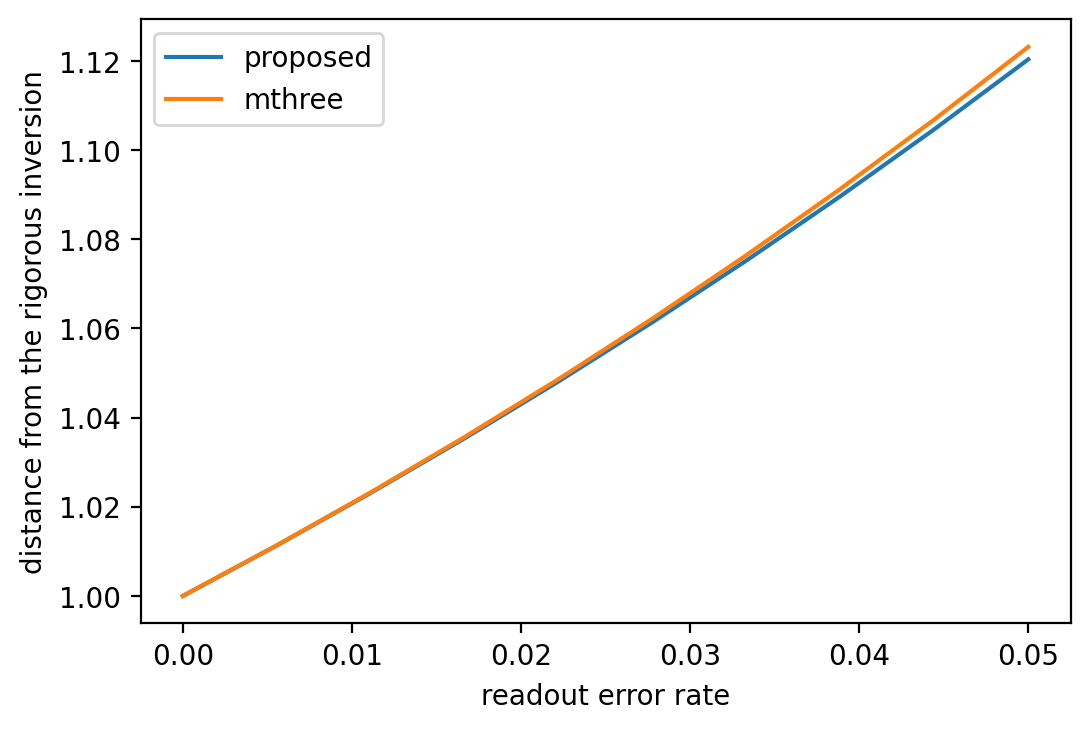

In [21]:
plt.clf()
plt.figure(dpi=200)
plt.plot(np.linspace(0, 0.05, 10), [proposed_norm.subs(p, i) for i in np.linspace(0, 0.05, 10)], label="proposed")
plt.plot(np.linspace(0, 0.05, 10), [mthree_norm.subs(p, i) for i in np.linspace(0, 0.05, 10)], label="mthree")
plt.legend()
plt.xlabel("readout error rate")
plt.ylabel("distance from the rigorous inversion")

In [18]:
mthree_raw_dist = A_S_inv_expand - A_inv_S
mthree_raw_dist

Matrix([
[   -(p**2 - 2*p + 1)/(4*p**2 - 4*p + 1) - 1/(2*p - 1),                                 -p/(2*p**2 - 3*p + 1) - (p**2 - p)/(4*p**2 - 4*p + 1), 0,                              -p**2/(4*p**2 - 4*p + 1)],
[-p/(2*p**2 - 3*p + 1) - (p**2 - p)/(4*p**2 - 4*p + 1), (-2*p**2 + 2*p - 1)/(2*p**3 - 5*p**2 + 4*p - 1) - (p**2 - 2*p + 1)/(4*p**2 - 4*p + 1), 0, -p/(2*p**2 - 3*p + 1) - (p**2 - p)/(4*p**2 - 4*p + 1)],
[                                                    0,                                                                                     0, 0,                                                     0],
[                             -p**2/(4*p**2 - 4*p + 1),                                 -p/(2*p**2 - 3*p + 1) - (p**2 - p)/(4*p**2 - 4*p + 1), 0,    -(p**2 - 2*p + 1)/(4*p**2 - 4*p + 1) - 1/(2*p - 1)]])

In [19]:
mthree_raw_norm = mthree_raw_dist.norm()
mthree_raw_norm

sqrt(2*Abs(p**2/(4*p**2 - 4*p + 1))**2 + 4*Abs(p/(2*p**2 - 3*p + 1) + (p**2 - p)/(4*p**2 - 4*p + 1))**2 + Abs((-2*p**2 + 2*p - 1)/(2*p**3 - 5*p**2 + 4*p - 1) - (p**2 - 2*p + 1)/(4*p**2 - 4*p + 1))**2 + 2*Abs((p**2 - 2*p + 1)/(4*p**2 - 4*p + 1) + 1/(2*p - 1))**2)

Text(0, 0.5, 'distance from the proposed method')

<Figure size 432x288 with 0 Axes>

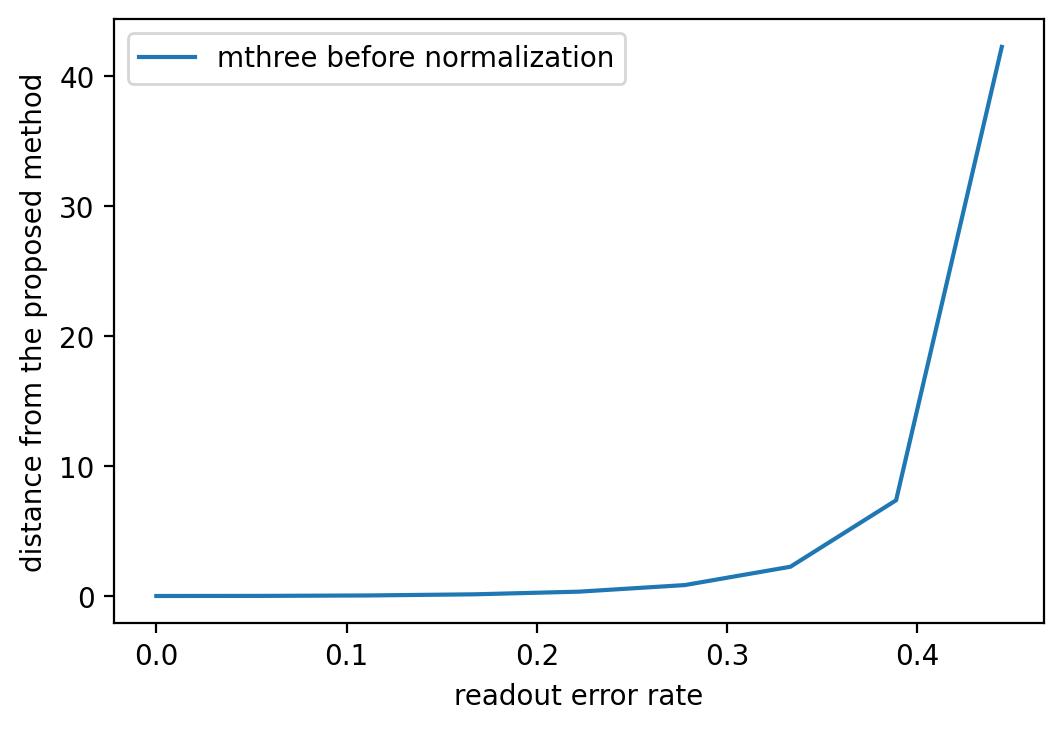

In [20]:
plt.clf()
plt.figure(dpi=200)
plt.plot(np.linspace(0, 0.5, 10), [mthree_raw_norm.subs(p, i) for i in np.linspace(0, 0.5, 10)], label="mthree before normalization")
plt.legend()
plt.xlabel("readout error rate")
plt.ylabel("distance from the proposed method")